In [6]:
import pandas as pd
import matplotlib as plt
import geopandas as gpd
import seaborn as sns
import numpy as np

#from mpl_toolkits.basemap import Basemap
%matplotlib inline

#from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.collections import PatchCollection
from descartes.patch import PolygonPatch


import json
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
#import gmaps
from math import sin, cos, sqrt, atan2, radians
import math

In [56]:
air_file=pd.read_csv('listings2.csv')

air_bnb_df=pd.DataFrame(air_file)

air_bnb_df=air_bnb_df.dropna()
air_bnb_df.sort_values(by=['last_review'],ascending=True,inplace=True)
air_bnb_df.reset_index()
air_bnb_df.head()

#extracting only 2018 data
start_date="2018-01-01"
end_date="2018-12-31"
mask = (air_bnb_df['last_review'] > start_date) & (air_bnb_df['last_review'] <= end_date)
air_bnb_df = air_bnb_df.loc[mask]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38879,25504322,stunning 3-BR 1-Bath in the financial District,115771987,Yuki,Manhattan,Financial District,40.705300,-74.008419,Entire home/apt,194,30,2,2018-12-06,1.46,11,270
48639,30468644,In the Heart of Manhattan!,11348789,Terry,Manhattan,Hell's Kitchen,40.758845,-73.995603,Private room,79,1,1,2018-12-06,1.00,1,14
19507,13612947,Entire Cozy 1Bdr Apartment in the Heart of Ast...,76332312,Alesia,Queens,Astoria,40.760726,-73.922025,Entire home/apt,75,3,14,2018-12-06,1.65,1,17
42569,27906951,Private Sunny Room in Hip Luxury Building,35795661,Alex,Brooklyn,Bushwick,40.700373,-73.929396,Private room,75,1,11,2018-12-06,3.44,1,140
25597,17979772,Half An Hour From Mahattan,5708673,Meike,Queens,Jackson Heights,40.749944,-73.884179,Entire home/apt,70,6,5,2018-12-06,0.27,1,1


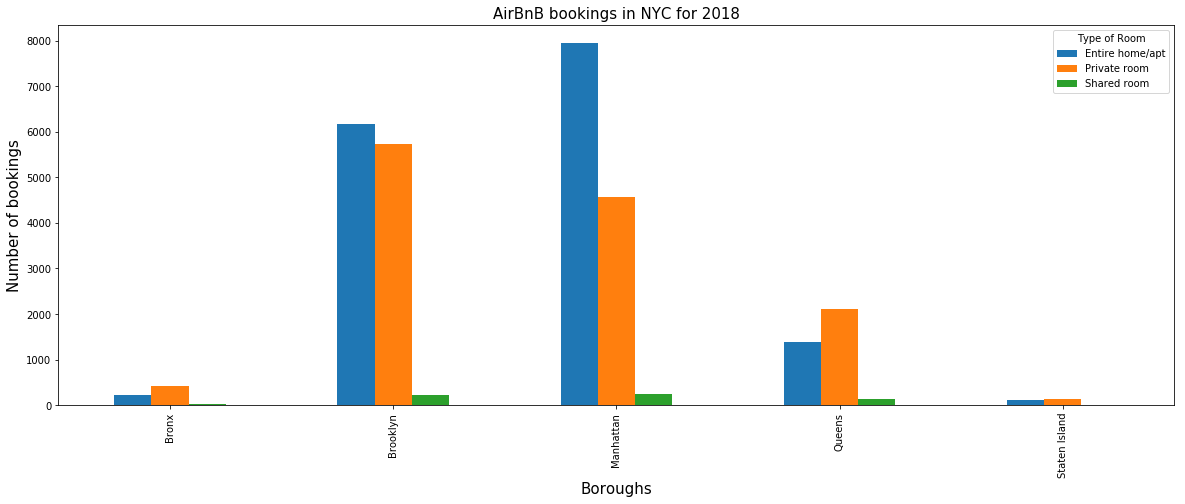

In [177]:
air_nghbr_df2=air_bnb_df.groupby(['neighbourhood_group','room_type'])
count2=air_nghbr_df2.count()
count2.index.levels[0]

newdf=count2.unstack()
newdf['id'].index

fig, ax = plt.subplots(figsize=(20,7))
newdf['id'].plot(kind='bar', stacked=False,ax=ax)
plt.xlabel('Boroughs',size=15)
plt.ylabel('Number of bookings',size=15)
plt.title("AirBnB bookings in NYC for 2018",size=15)
plt.legend(title="Type of Room")
plt.savefig('images/rohini_plot1.png')

In [27]:
nbgeo = gpd.read_file('neighbourhoods.geojson')
nbgeo.head()

,neighbourhood,neighbourhood_group,geometry
0,Bayswater,Queens,"(POLYGON ((-73.76670799999999 40.614911, -73.7..."
1,Allerton,Bronx,"(POLYGON ((-73.848597 40.87167, -73.845823 40...."
2,City Island,Bronx,"(POLYGON ((-73.782822 40.843919, -73.782572 40..."
3,Ditmars Steinway,Queens,"(POLYGON ((-73.90160299999999 40.76777, -73.90..."
4,Ozone Park,Queens,"(POLYGON ((-73.83754399999999 40.691364, -73.8..."


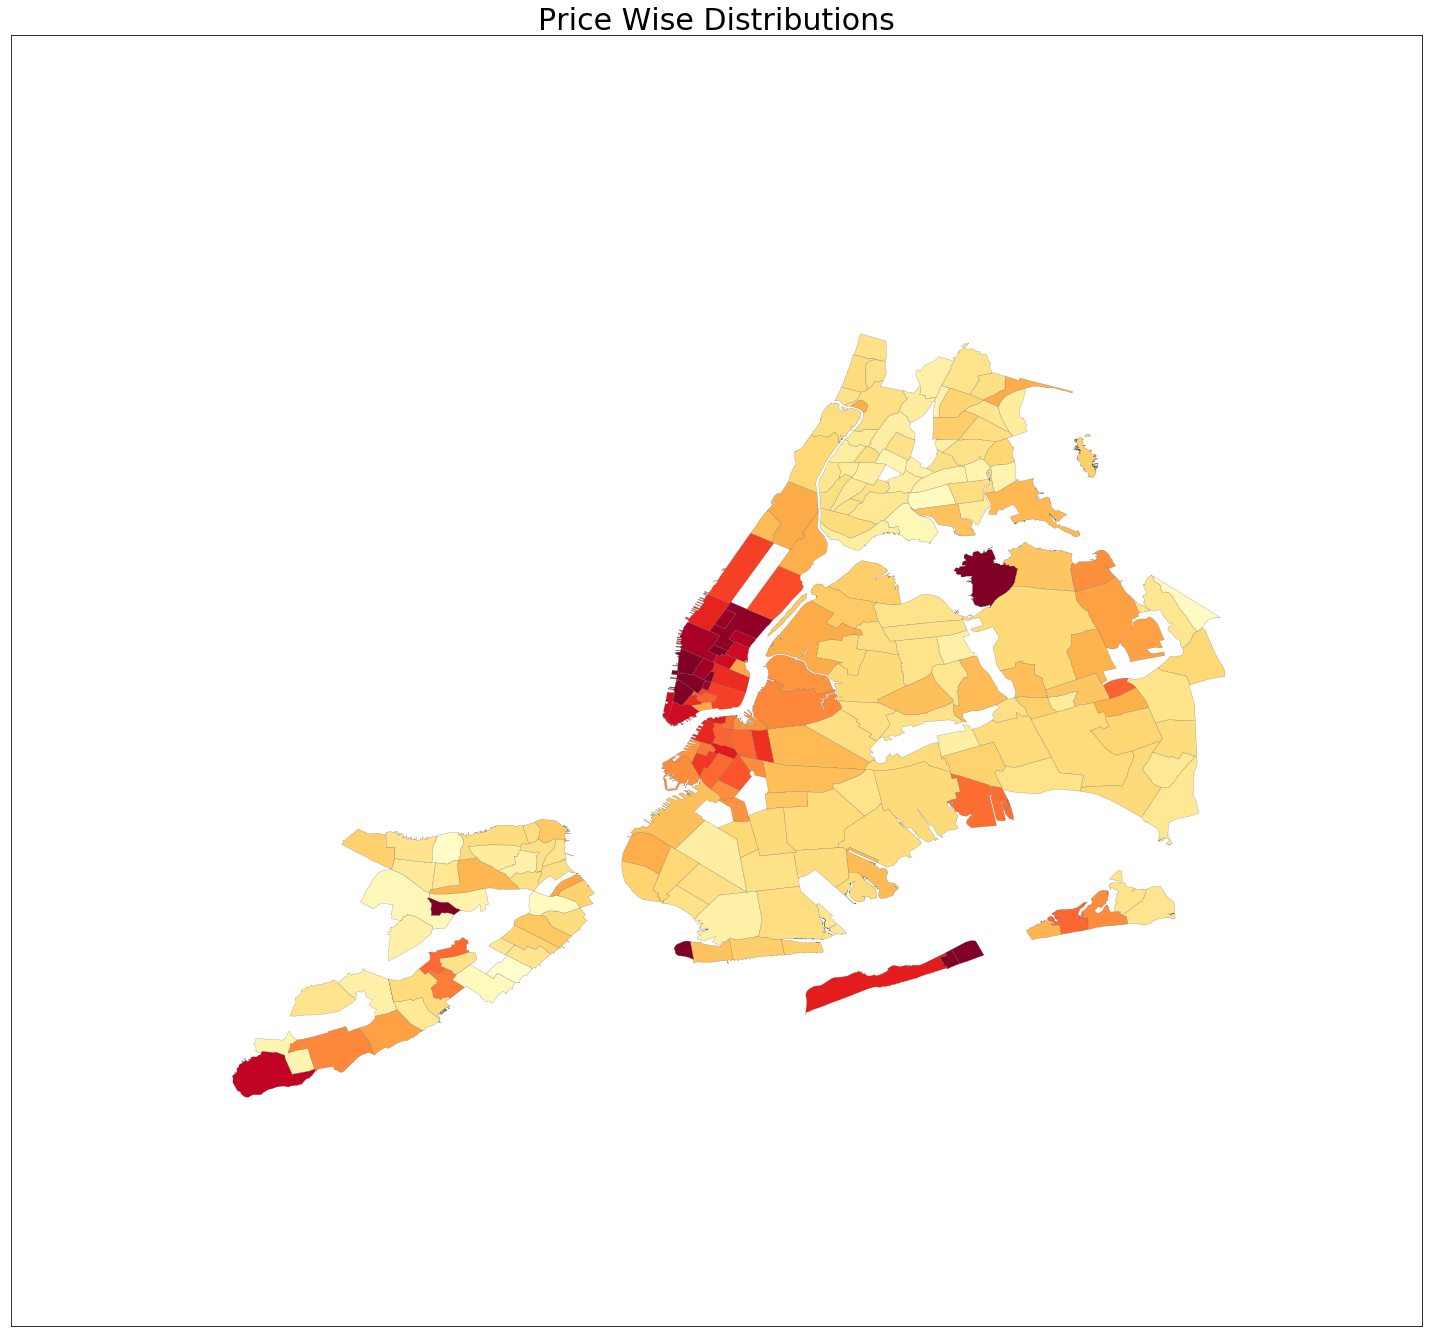

<Figure size 432x288 with 0 Axes>

In [28]:

# Price Geometry Distribution 

prices = air_bnb_df[["id","neighbourhood","price","reviews_per_month"]].groupby(["neighbourhood"]).price.mean()
priceMap = dict(prices)

max_ = max(priceMap.values())
min_ = min(priceMap.values())
def norm_transform(price):
    return (price-min_)/( 250 - min_)#Hard Coding Truncature Here at 250 USD here to see a more meaningful result


mp = nbgeo.geometry.loc[101]
cm = plt.get_cmap('YlOrRd')
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
minx, miny, maxx, maxy = mp.bounds
w, h = maxx - minx, maxy - miny
ax.set_xlim(minx - 20 * w, maxx + 20 * w)
ax.set_ylim(miny - 15 * h, maxy + 20 * h)
ax.set_aspect(1)


for i in range(len(nbgeo.geometry)):
    patches = []
    mp = nbgeo.geometry.loc[i]
    nb = nbgeo.neighbourhood.loc[i]
    try:
        price = priceMap[nb]
    except:
        continue
    for idx, p in enumerate(mp):
        colour = cm(norm_transform(price))
        patches.append(PolygonPatch(p, fc=colour, ec='#555555', lw=0.2, alpha=1., zorder=1))
        ax.add_collection(PatchCollection(patches, match_original=True))

###############DRAW##################################
ax.set_xticks([])
ax.set_yticks([])
plt.title("Price Wise Distributions",size=30)
plt.tight_layout()
plt.show()
plt.savefig("images/rohini_plot2.png")

No handles with labels found to put in legend.


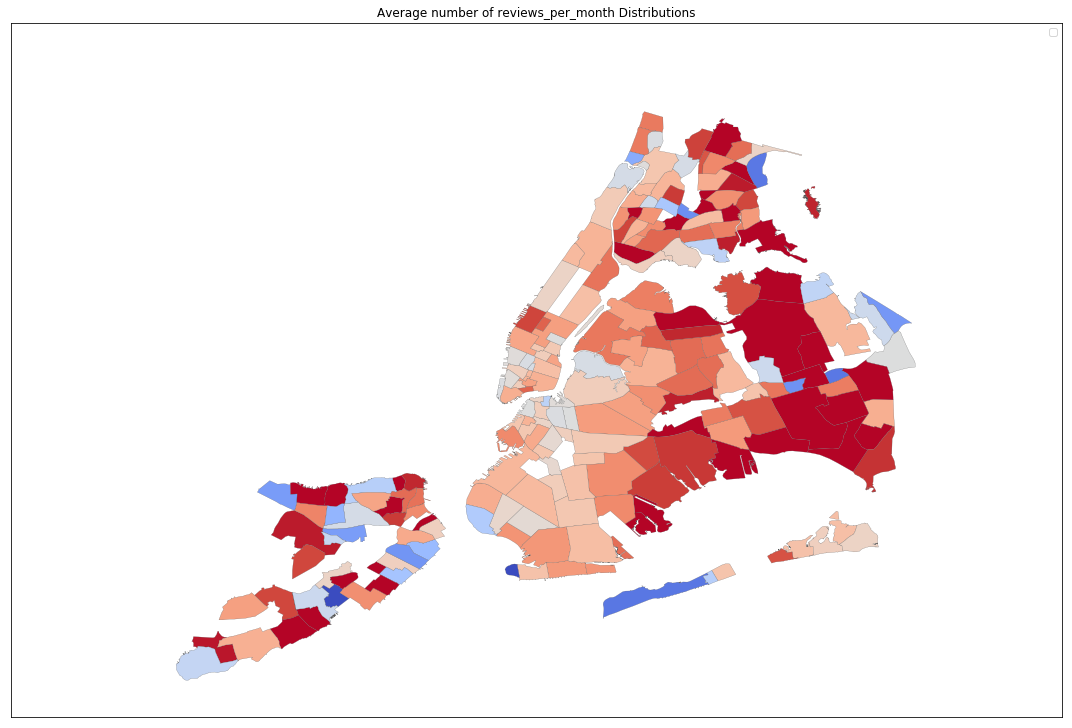

In [29]:
# reviews_per_month Geometry Distribution 

reviews_per_months = air_bnb_df[["id","neighbourhood","price","reviews_per_month"]].groupby(["neighbourhood"]).reviews_per_month.mean()
reviews_per_monthMap = dict(reviews_per_months)

max_ = max(reviews_per_monthMap.values())
min_ = min(reviews_per_monthMap.values())
def norm_transform(reviews_per_month):
    return (reviews_per_month-min_)/( 2.5 - min_)#Hard Coding Truncature Here at 2.5  here to see a more meaningful result


###############SET UP LIMITS#########################
mp = nbgeo.geometry.loc[101]
cm = plt.get_cmap('coolwarm')
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(111)
minx, miny, maxx, maxy = mp.bounds
w, h = maxx - minx, maxy - miny
ax.set_xlim(minx - 20 * w, maxx + 20 * w)
ax.set_ylim(miny - 10 * h, maxy + 15 * h)
ax.set_aspect(1)

###############ADD NEIGHBOURS#########################
for i in range(len(nbgeo.geometry)):
    patches = []
    mp = nbgeo.geometry.loc[i]
    nb = nbgeo.neighbourhood.loc[i]
    try:
        reviews_per_month = reviews_per_monthMap[nb]
    except:
        continue
    for idx, p in enumerate(mp):
        colour = cm(norm_transform(reviews_per_month))
        patches.append(PolygonPatch(p, fc=colour, ec='#555555', lw=0.2, alpha=1., zorder=1))
        ax.add_collection(PatchCollection(patches, match_original=True))

###############DRAW##################################
ax.set_xticks([])
ax.set_yticks([])
ax.legend()
plt.title("Average number of reviews_per_month Distributions")
plt.tight_layout()
plt.show()


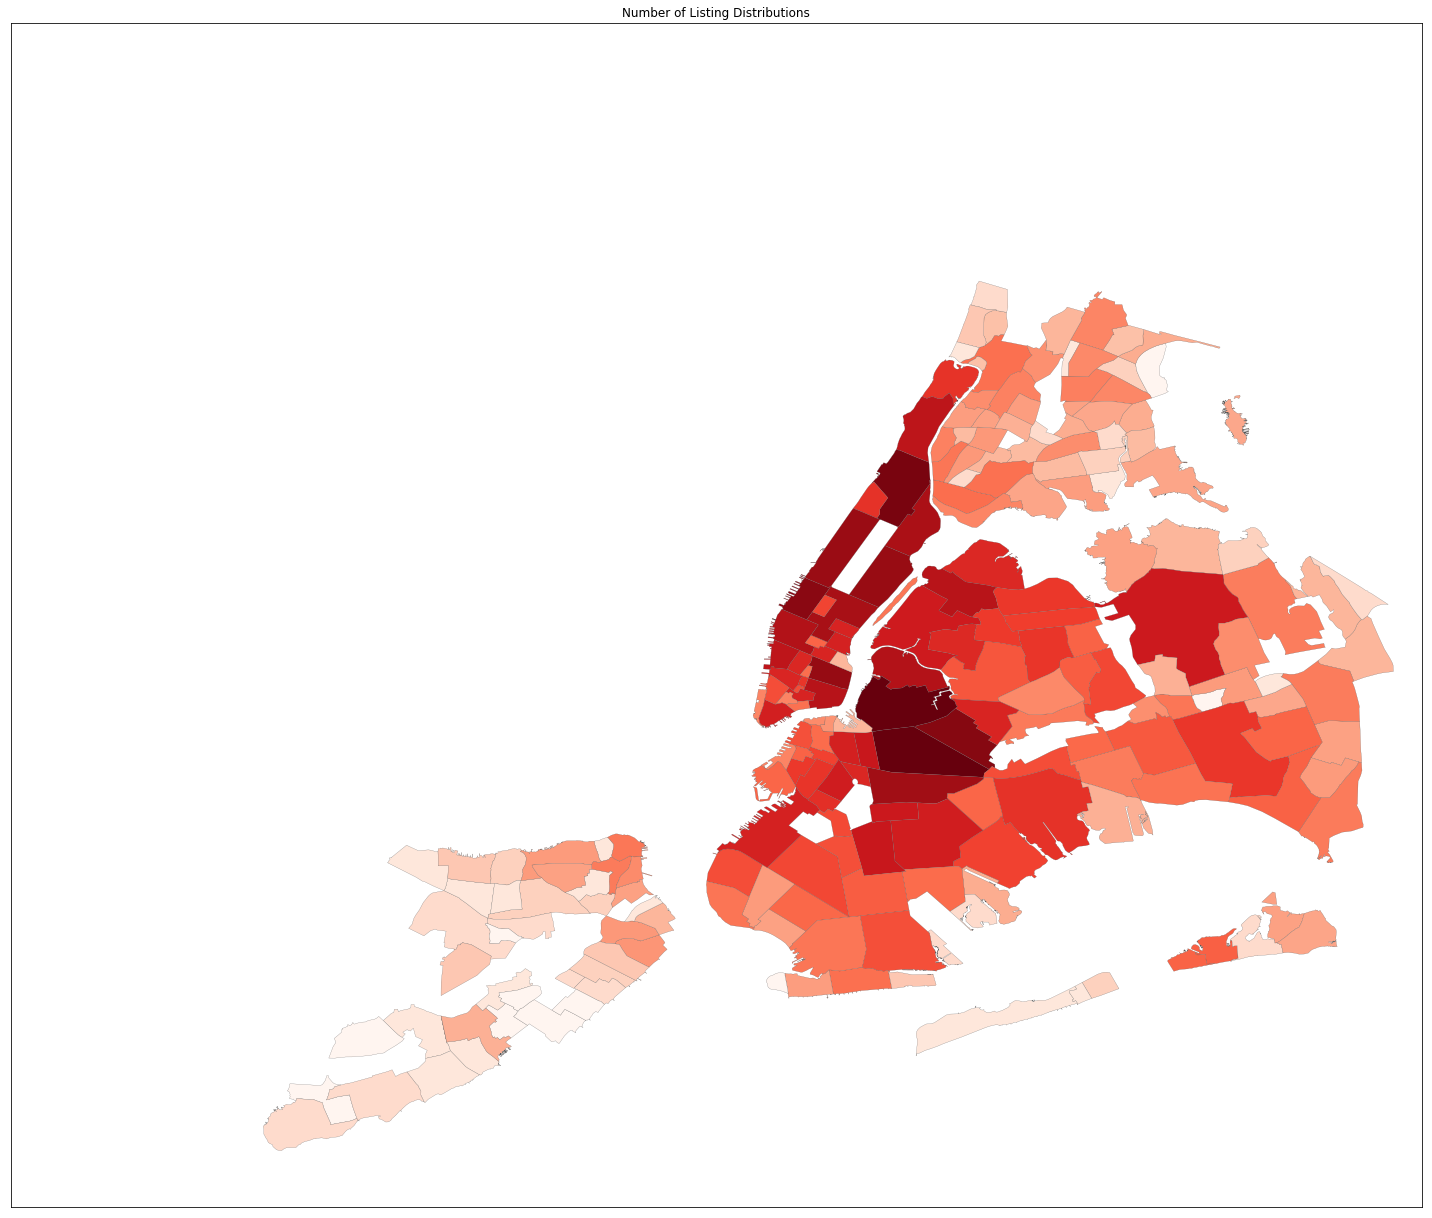

In [30]:
# Listing ID count Geometry Distribution 

counts = air_bnb_df[["id","neighbourhood","price","reviews_per_month"]].groupby(["neighbourhood"]).id.count()
countsMap = dict(counts.apply(np.log))

max_ = max(countsMap.values())
min_ = min(countsMap.values())
def norm_transform(count):
    return (count-min_)/( max_ - min_)#Hard Coding Truncature Here at 250 USD here to see a more meaningful result


###############SET UP LIMITS#########################
mp = nbgeo.geometry.loc[101]
cm = plt.get_cmap('Reds')
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
minx, miny, maxx, maxy = mp.bounds
w, h = maxx - minx, maxy - miny
ax.set_xlim(minx - 20 * w, maxx + 15 * w)
ax.set_ylim(miny - 10 * h, maxy + 18 * h)
ax.set_aspect(1)

###############ADD NEIGHBOURS#########################
for i in range(len(nbgeo.geometry)):
    patches = []
    mp = nbgeo.geometry.loc[i]
    nb = nbgeo.neighbourhood.loc[i]
    try:
        count = countsMap[nb]
    except:
        continue
    for idx, p in enumerate(mp):
        colour = cm(norm_transform(count))
        patches.append(PolygonPatch(p, fc=colour, ec='#555555', lw=0.2, alpha=1., zorder=1))
        ax.add_collection(PatchCollection(patches, match_original=True))

###############DRAW##################################
ax.set_xticks([])
ax.set_yticks([])
plt.title("Number of Listing Distributions")
plt.tight_layout()
plt.show()

In [31]:
air_bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3336,1682451,Luxury Doorman Studio in Midtown HK,3539762,Jason,Manhattan,Hell's Kitchen,40.765597,-73.987859,Entire home/apt,250,7,3,2018-01-02,0.08,1,57
32856,21899241,Spacious and bright private bedroom in LES,41865841,Tom,Manhattan,Lower East Side,40.713249,-73.990095,Private room,160,2,2,2018-01-02,0.16,1,0
33392,22079720,Shared Clinton hill apartment for a female,161292822,Aakanksha,Brooklyn,Clinton Hill,40.693942,-73.966614,Private room,60,15,1,2018-01-02,0.09,1,49
4231,2243321,A cozy apartment,11457662,Indie,Brooklyn,Bensonhurst,40.609309,-73.998474,Entire home/apt,45,2,28,2018-01-02,0.48,2,0
5271,3265410,Private BR in Apartment 15 Mins. From Manhattan,16514175,Karen,Queens,Elmhurst,40.746438,-73.886563,Private room,60,4,40,2018-01-02,0.73,5,0


C:\Users\rohin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0,0.5,'Average Price ($)')

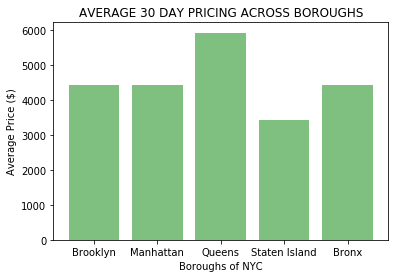

In [32]:
month_long_listings=air_bnb_df[air_bnb_df['minimum_nights']==30]
month_long_entire_home_df=month_long_listings[month_long_listings['room_type'].str.contains('Entire home/apt')]

month_long_entire_home_df['monthly_rent']=month_long_entire_home_df['price']* 30

all5_boroughs=month_long_entire_home_df['neighbourhood_group'].unique()

mean_rent_airbnb=month_long_entire_home_df.groupby(['neighbourhood_group'])['monthly_rent'].mean()
plt.bar(all5_boroughs,mean_rent_airbnb,color='green',alpha=0.5)


plt.title("AVERAGE 30 DAY PRICING ACROSS BOROUGHS")
plt.xlabel("Boroughs of NYC")
plt.ylabel("Average Price ($)")

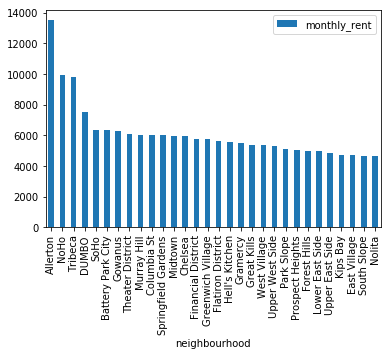

In [101]:
month_long_entire_home_df.head()

month_long_nghrhood_df=month_long_entire_home_df.groupby(['neighbourhood'])['monthly_rent'].mean()
top20_listings=month_long_nghrhood_df.sort_values(ascending=False).head(30)
top20_listings

month_long_entire_home_df.head()
top20_listings=pd.DataFrame(top20_listings)

#top20_listings.plot(kind="bar")
#top20_listings=top20_listings.index.sort_values()
#top20_listings.sort_index(inplace=True)
top20_listings

top20_listings.plot(kind="bar")

In [165]:

top15_df_1=month_long_entire_home_df.groupby(['neighbourhood','calculated_host_listings_count','number_of_reviews'])['price'].mean()
top15_df=top15_df_1.sort_values(ascending=False).head(15)
top15_df=pd.DataFrame(top15_df)
top15_df=top15_df.reset_index()
top15_df

,neighbourhood,calculated_host_listings_count,number_of_reviews,price
0,SoHo,1,158,495.0
1,NoHo,1,44,465.0
2,Midtown,5,1,455.0
3,Allerton,4,44,450.0
4,Gramercy,2,2,450.0
5,Hell's Kitchen,98,2,412.0
6,Williamsburg,2,8,400.0
7,Gowanus,1,28,400.0
8,Hell's Kitchen,39,5,400.0
9,Murray Hill,44,3,400.0


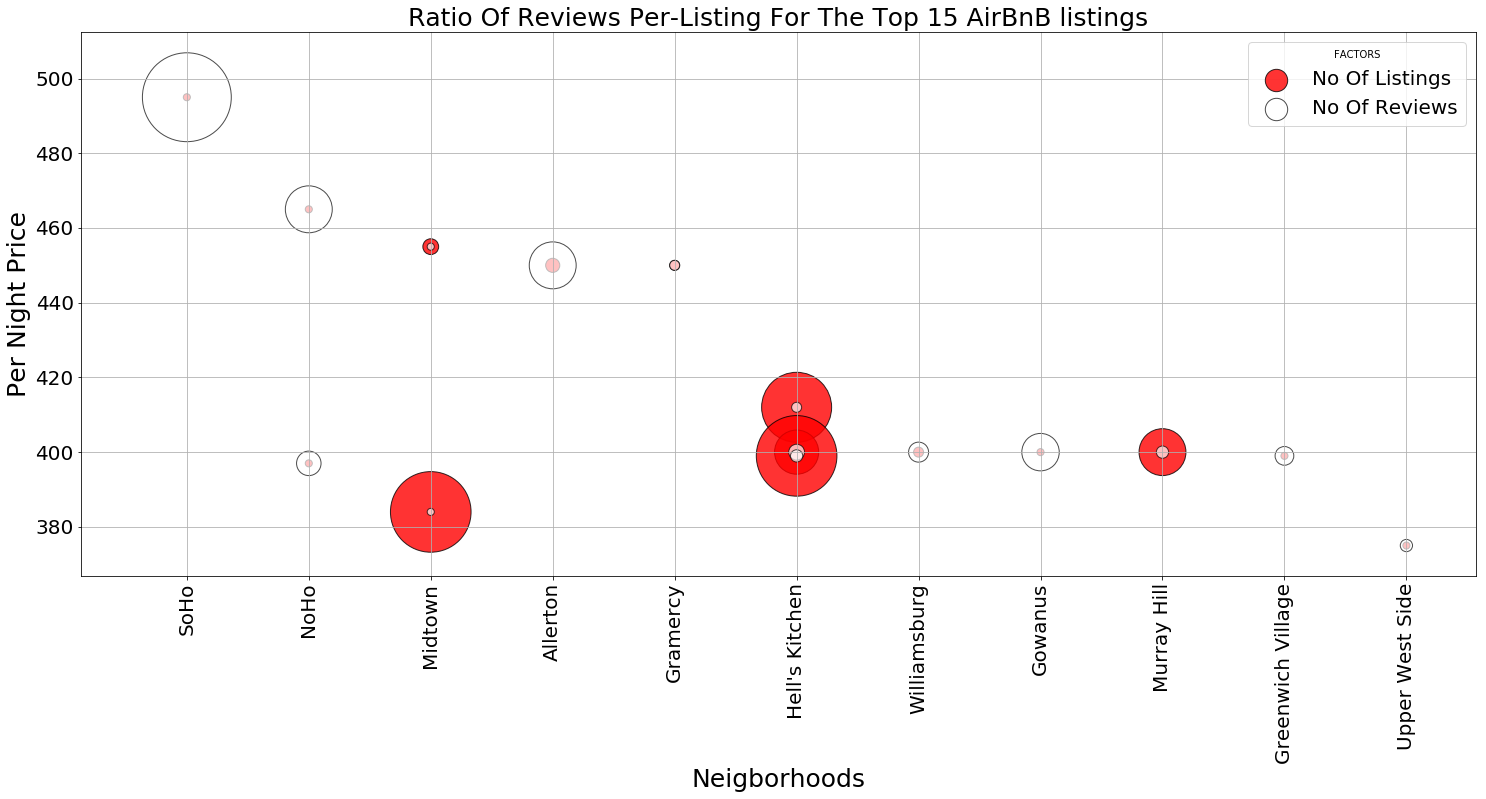

In [170]:
plt.figure(figsize=(25,10))
plt.scatter(top15_df['neighbourhood'],top15_df['price'],s=top15_df['calculated_host_listings_count']*50,color='red',alpha=0.8,edgecolor='black')
plt.scatter(top15_df['neighbourhood'],top15_df['price'],s=top15_df['number_of_reviews']*50,color='white',alpha=0.7,edgecolor='black')

plt.grid()
plt.title("Ratio Of Reviews Per-Listing For The Top 15 AirBnB listings",size=25)
plt.xlabel("Neigborhoods",size=25)
plt.ylabel("Per Night Price",size=25)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
airbnb_labels=["No Of Listings","No Of Reviews"]
airbnb_legend=plt.legend(title="FACTORS",labels=airbnb_labels,fontsize=20)
airbnb_legend.legendHandles[0]._sizes=[500]
airbnb_legend.legendHandles[1]._sizes=[500]

In [35]:
air_bnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3336,1682451,Luxury Doorman Studio in Midtown HK,3539762,Jason,Manhattan,Hell's Kitchen,40.765597,-73.987859,Entire home/apt,250,7,3,2018-01-02,0.08,1,57
32856,21899241,Spacious and bright private bedroom in LES,41865841,Tom,Manhattan,Lower East Side,40.713249,-73.990095,Private room,160,2,2,2018-01-02,0.16,1,0
33392,22079720,Shared Clinton hill apartment for a female,161292822,Aakanksha,Brooklyn,Clinton Hill,40.693942,-73.966614,Private room,60,15,1,2018-01-02,0.09,1,49
4231,2243321,A cozy apartment,11457662,Indie,Brooklyn,Bensonhurst,40.609309,-73.998474,Entire home/apt,45,2,28,2018-01-02,0.48,2,0
5271,3265410,Private BR in Apartment 15 Mins. From Manhattan,16514175,Karen,Queens,Elmhurst,40.746438,-73.886563,Private room,60,4,40,2018-01-02,0.73,5,0
29662,20459381,"Cozy, bright, Greenwich Village studio for 2!",17575348,Marissa,Manhattan,Greenwich Village,40.733342,-73.994162,Entire home/apt,200,2,3,2018-01-02,0.20,1,0
33301,22029995,"Beautiful, bright apartment in prime Williamsburg",6967723,Emily & Mathias,Brooklyn,Williamsburg,40.716029,-73.957492,Entire home/apt,209,7,1,2018-01-02,0.09,1,0
32800,21859249,"Cozy, bright and spacious 3BR apartment - Broo...",49213265,Mariana,Brooklyn,Crown Heights,40.670246,-73.935579,Entire home/apt,99,7,1,2018-01-02,0.09,1,5
32344,21745600,Full & Cozy Apartment at Bed-Stuy,4032781,Dinorah,Brooklyn,Bedford-Stuyvesant,40.683274,-73.949865,Entire home/apt,70,3,4,2018-01-02,0.32,1,0
33286,22028109,Serene artistic apartment in Redhook,2079259,Sarah,Brooklyn,Red Hook,40.676452,-74.014177,Entire home/apt,150,4,1,2018-01-02,0.09,1,6


In [172]:
file_price = "medianAskingRent_All.csv"


file_df_price = pd.read_csv(file_price, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
# file2 = file_df_price.loc[file_df_price["areaType"]=="neighborhood"] #select only neighborhood
# file2.dtypes


# cols_price = file2.columns.drop(['Borough',"areaName","areaType"])
# file2[cols_price] = file2[cols_price].apply(pd.to_numeric, errors='coerce')
# file2.head()


rental_df2018_only=file_df_price.iloc[:,99:109]
rental_df_first3_col=file_df_price.iloc[:,0:2]
#rental_df=pd.concat(file_df_price.iloc[:,0:2],rental_df2018_only)
rental_df=pd.concat([rental_df_first3_col,rental_df2018_only],axis=1)
rental_df.dropna(inplace=True)
rental_df['2018-01'].apply(pd.to_numeric, errors='coerce')

rental_df_num=rental_df.iloc[:,2:12].apply(pd.to_numeric, errors='coerce')
rental_df_num
rental_df=pd.concat([rental_df_first3_col,rental_df_num],axis=1)
rental_df=rental_df.dropna()
rental_df['2018 Rent']=rental_df[['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10']].mean(axis=1)

rental_df=pd.concat([rental_df_first3_col,rental_df['2018 Rent']],axis=1)
rental_df=rental_df.dropna()
rental_df.head()

# df['C'] =  df[['A', 'B']].sum(axis=1)

,areaName,Borough,2018 Rent
0,All Downtown,Manhattan,3780.7
1,All Midtown,Manhattan,3493.0
2,All Upper East Side,Manhattan,2904.8
3,All Upper Manhattan,Manhattan,2349.7
4,All Upper West Side,Manhattan,3332.8


In [79]:
top20_rentals=rental_df.sort_values('2018 Rent',ascending=False).head(30)

top20_rentals.head()

,areaName,Borough,2018 Rent
36,Central Park South,Manhattan,7427.3
183,Tribeca,Manhattan,6677.6
167,SoHo,Manhattan,5269.3
71,Flatiron,Manhattan,4658.5
9,Battery Park City,Manhattan,4542.6


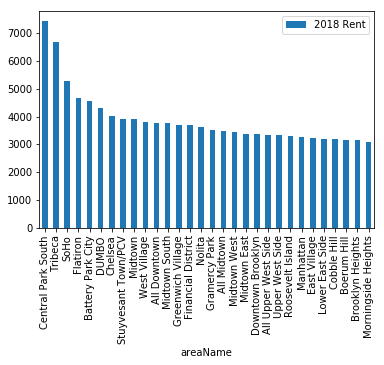

In [103]:
top20_rentals_newdf=top20_rentals.set_index('areaName')
top20_rentals_newdf=top20_rentals_newdf.drop('Borough',1)
#top20_rentals_newdf.sort_index(inplace=True)
top20_rentals_newdf
top20_rentals_newdf.plot(kind="bar")

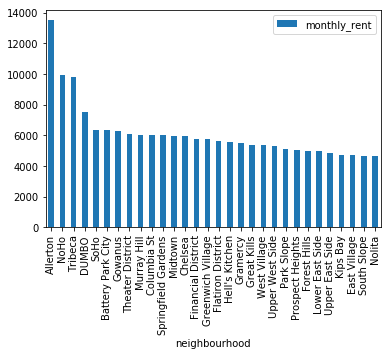

In [106]:
month_long_entire_home_df.head()
month_long_entire_home_df=month_long_entire_home_df[month_long_entire_home_df['price']<500]

month_long_nghrhood_df=month_long_entire_home_df.groupby(['neighbourhood'])['monthly_rent'].mean()
top20_listings=month_long_nghrhood_df.sort_values(ascending=False).head(30)
top20_listings

month_long_entire_home_df.head()
top20_listings=pd.DataFrame(top20_listings)

#top20_listings.plot(kind="bar")
#top20_listings=top20_listings.index.sort_values()
#top20_listings.sort_index(inplace=True)
top20_listings

top20_listings.plot(kind="bar")

Text(0,0.5,'Average Listing Price')

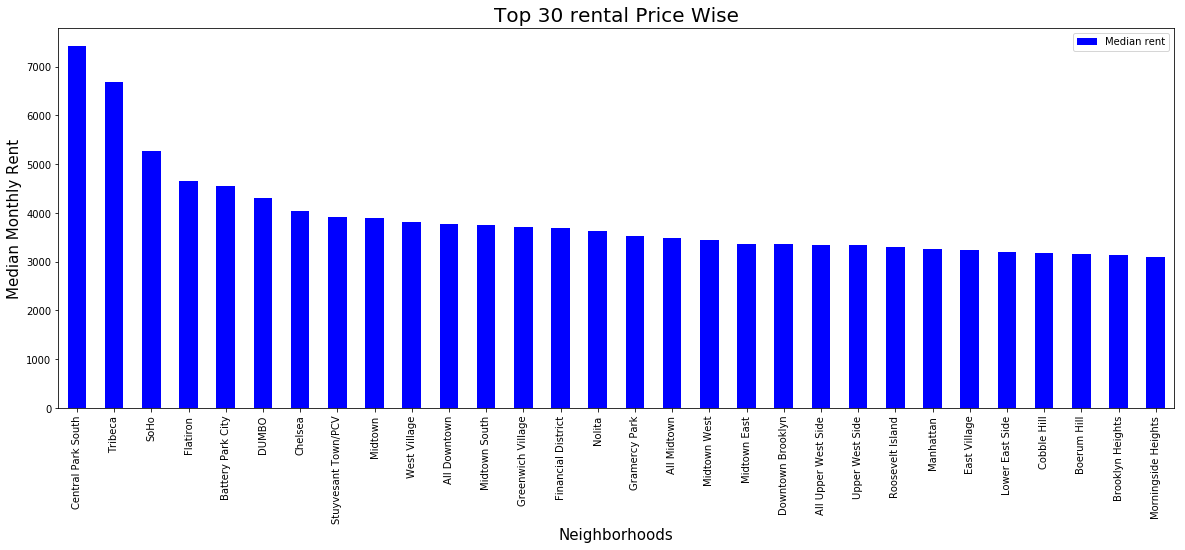

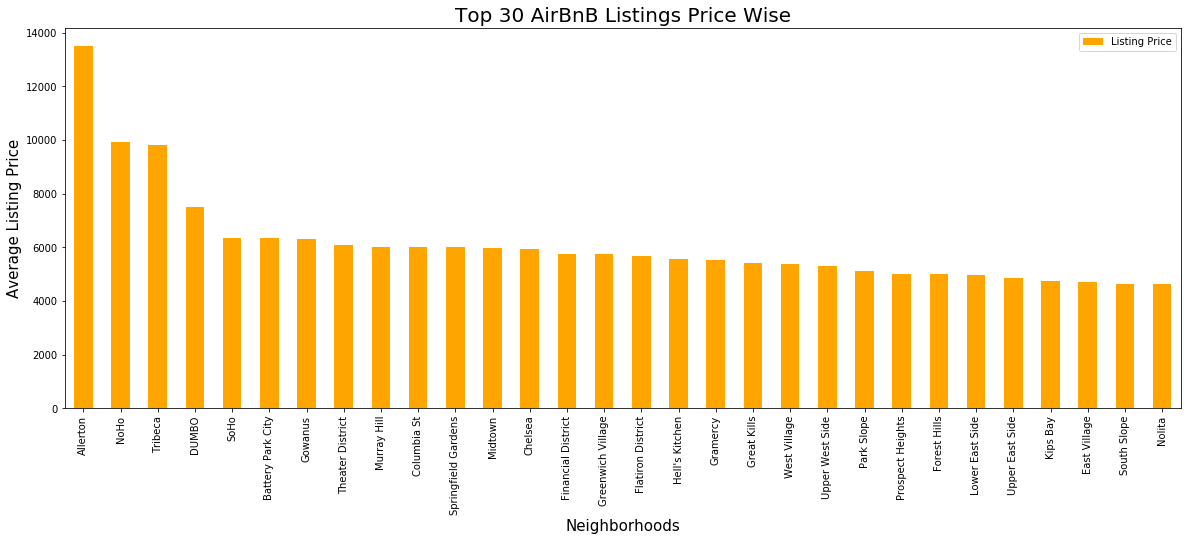

In [107]:
fig, ax1 = plt.subplots(figsize=(20,7))
fig, ax2 = plt.subplots(figsize=(20,7))
top20_rentals_newdf.plot(kind="bar",ax=ax1,color='blue')
top20_listings.plot(kind="bar",ax=ax2,color='orange')

ax1.set_title("Top 30 rental Price Wise",size=20)
ax1.legend(["Median rent"])
ax1.set_xlabel("Neighborhoods",size=15)
ax1.set_ylabel("Median Monthly Rent",size=15)

ax2.set_title("Top 30 AirBnB Listings Price Wise",size=20)
ax2.legend(["Listing Price"])
ax2.set_xlabel("Neighborhoods",size=15)
ax2.set_ylabel("Average Listing Price",size=15)

In [108]:
common_areas=set(top20_listings.index).intersection(set(top20_rentals['areaName']))
common_areas_list=[f for f in common_areas]
common_areas_list

['West Village',
 'Upper West Side',
 'Tribeca',
 'DUMBO',
 'SoHo',
 'Financial District',
 'Nolita',
 'Greenwich Village',
 'East Village',
 'Midtown',
 'Battery Park City',
 'Chelsea',
 'Lower East Side']

In [109]:
common1_df=top20_rentals.loc[top20_rentals['areaName'].isin(common_areas_list)][['areaName','2018 Rent']]
common1_df.sort_values('areaName',inplace=True)
common1_df.head()


,areaName,2018 Rent
9,Battery Park City,4542.6
38,Chelsea,4034.8
54,DUMBO,4300.8
65,East Village,3245.2
69,Financial District,3697.5


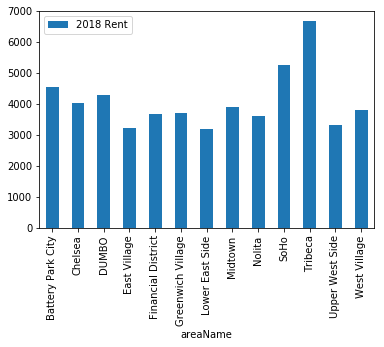

In [110]:
common1_df_new=common1_df.set_index('areaName')
common1_df_new.plot(kind="bar")

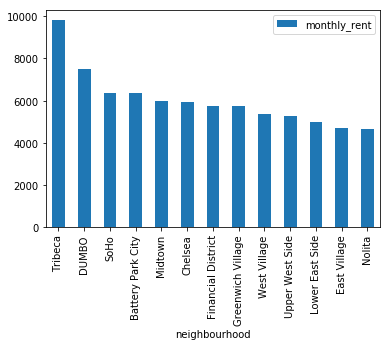

In [111]:
common2_df=top20_listings.loc[top20_listings.index.isin(common_areas_list)]
common2_df.plot(kind="bar")

C:\Users\rohin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Text(0,0.5,'Average Listing Price')

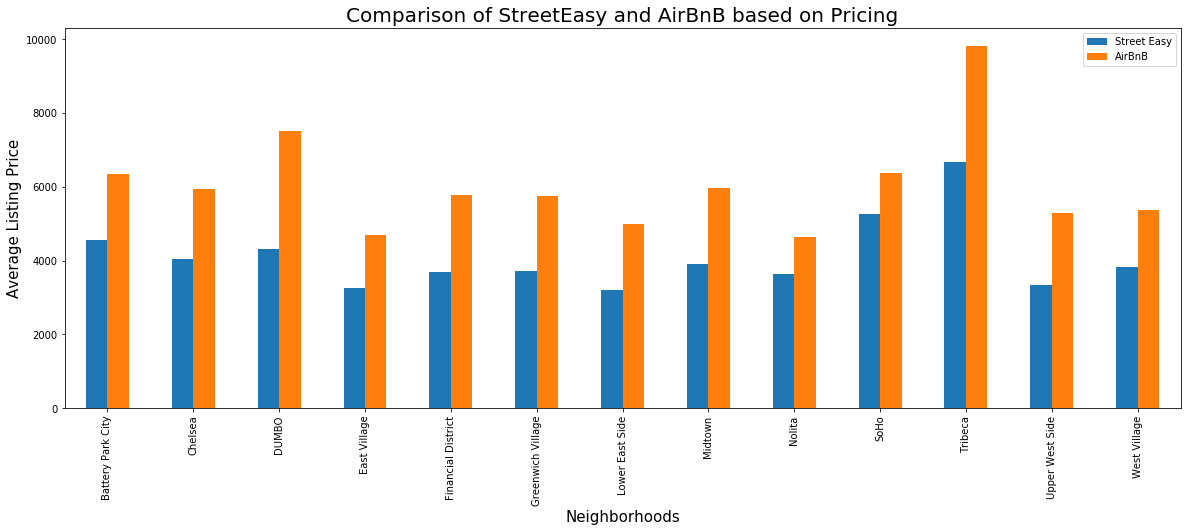

In [112]:
new_common_df=pd.concat([common1_df_new,common2_df],axis=1)
fig, ax = plt.subplots(figsize=(20,7))
new_common_df.plot(kind="bar",ax=ax)

ax.set_title("Comparison of StreetEasy and AirBnB based on Pricing",size=20)
ax.legend(["Street Easy","AirBnB"])
ax.set_xlabel("Neighborhoods",size=15)
ax.set_ylabel("Average Listing Price",size=15)

Text(0,0.5,'Average Unit Count')

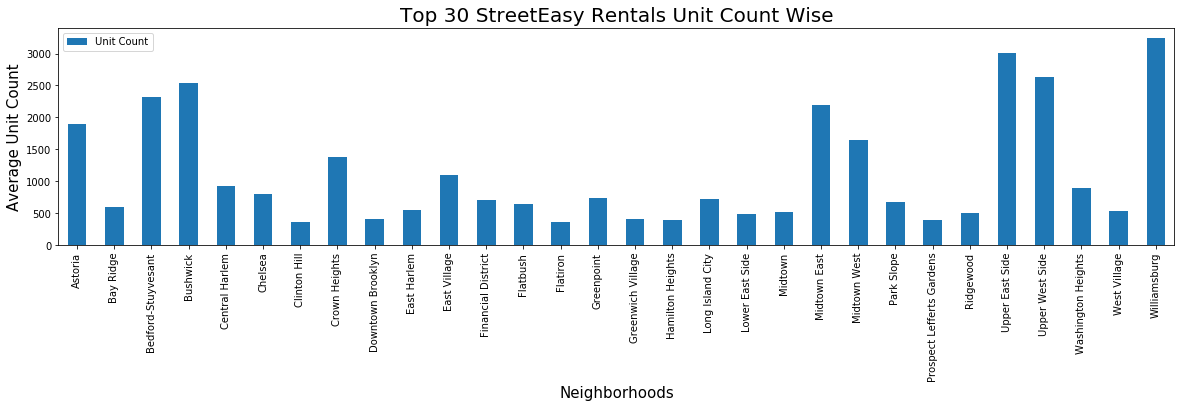

In [173]:
file_inventory = "rentalInventory_All.csv"

# Now, read the data into a DataFrame
file_df = pd.read_csv(file_inventory, sep=',', error_bad_lines=False, index_col=False, dtype='unicode')
file1 = file_df.loc[file_df["areaType"]=="neighborhood"] #select only neighborhood
file1



# unit_df2018_only=file1.iloc[:,99:109]
# unit_df2018_only
# unit_df_first3_col=file1.iloc[:,0:2]
unit_df=pd.concat([file1.iloc[:,0:2],file1.iloc[:,99:109]],axis=1)

unit_df_num=unit_df.iloc[:,2:12].apply(pd.to_numeric, errors='coerce')
unit_df_num
unit_df=pd.concat([file1.iloc[:,0:2],unit_df_num],axis=1)
unit_df=unit_df.dropna()
#unit_df['2018 Units']=unit_df[['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10']].mean(axis=1)
unit_df['2018 Units']=unit_df[['2018-10']].sum(axis=1)


unit_df=pd.concat([file1.iloc[:,0:2],unit_df['2018 Units']],axis=1)
unit_df.dropna(inplace=True)

unit_df.drop('Borough', axis=1, inplace=True)
unit_df_final=unit_df.set_index('areaName')
unit_df_final=unit_df_final.sort_values('2018 Units',ascending=False).head(30)
unit_df_final=unit_df_final.sort_index()


fig, ax = plt.subplots(figsize=(20,4))

unit_df_final.plot(kind="bar",ax=ax)

ax.set_title("Top 30 StreetEasy Rentals Unit Count Wise",size=20)
ax.legend(["Unit Count"])
ax.set_xlabel("Neighborhoods",size=15)
ax.set_ylabel("Average Unit Count",size=15)

Text(0,0.5,'Average Listings Count')

<Figure size 1440x360 with 0 Axes>

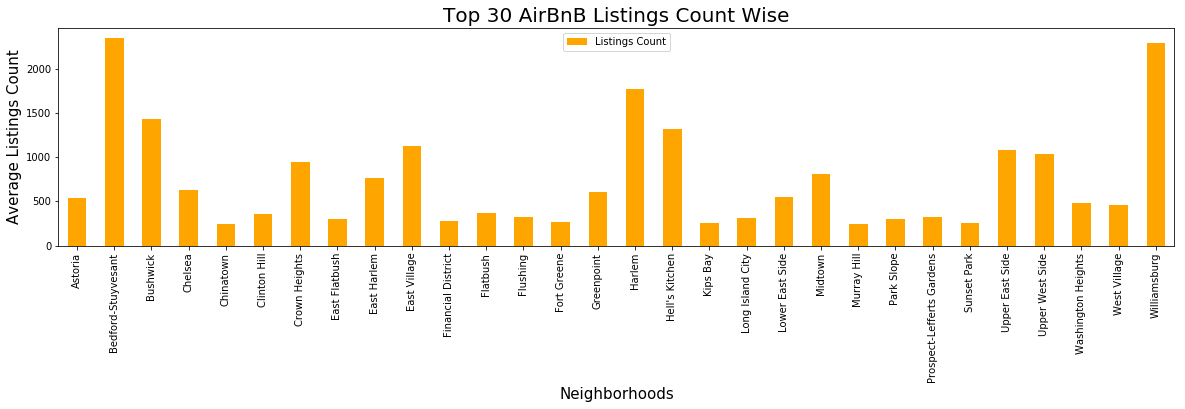

In [174]:
plt.figure(figsize=(20,5))
air_unit_df=air_bnb_df.groupby('neighbourhood')
#air_unit_df=air_bnb_df.groupby('neighbourhood')['minimum_nights']
# arr1=air_df1['id'].count()
# arr1

count_data_unit=air_unit_df.count()
count_data_unit=pd.DataFrame(count_data_unit)
count_data_unit_final=count_data_unit['id']
count_data_unit_final=pd.DataFrame(count_data_unit_final)
count_data_unit_final=count_data_unit_final.sort_values('id',ascending=False).head(30)
count_data_unit_final=count_data_unit_final.sort_index()
fig, ax = plt.subplots(figsize=(20,4))

count_data_unit_final.plot(kind="bar",ax=ax,color="orange")
#count_data_unit_final

ax.set_title("Top 30 AirBnB Listings Count Wise",size=20)
ax.legend(["Listings Count"])
ax.set_xlabel("Neighborhoods",size=15)
ax.set_ylabel("Average Listings Count",size=15)

Text(0,0.5,'Average Listings Count')

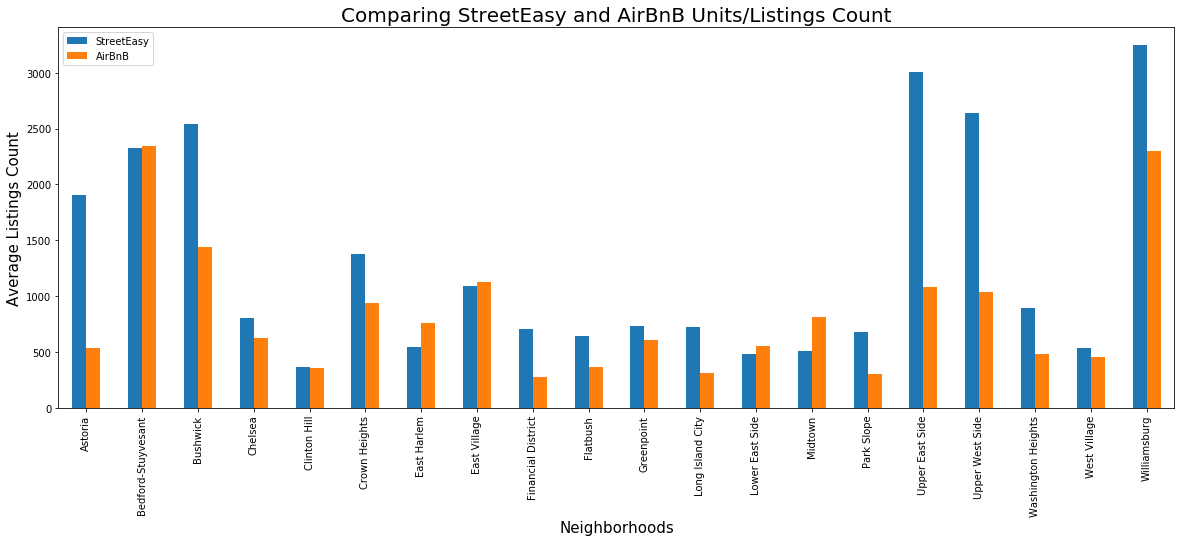

In [179]:
common_areas_unit=set(unit_df_final.index).intersection(set(count_data_unit_final.index))
common_areas_unit=[d for d in common_areas_unit]
common_areas_unit


common1_df_unit=unit_df_final.loc[unit_df_final.index.isin(common_areas_unit)]
common2_df_unit=count_data_unit_final.loc[count_data_unit_final.index.isin(common_areas_unit)]

new_common_unit_df=pd.concat([common1_df_unit,common2_df_unit],axis=1)
fig, ax = plt.subplots(figsize=(20,7))
new_common_unit_df.plot(kind="bar",ax=ax)


ax.set_title("Comparing StreetEasy and AirBnB Units/Listings Count",size=20)
ax.legend(["StreetEasy","AirBnB"])
ax.set_xlabel("Neighborhoods",size=15)
ax.set_ylabel("Average Listings Count",size=15)